<a href="https://colab.research.google.com/github/fmonteci/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda["Precio"].describe()


,Precio
count,2359.00
mean,487867.91
std,614686.77
min,7600.00
25%,55750.00
50%,235300.00
75%,678100.00
max,2977000.00


In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda2["Precio"].describe()


,Precio
count,2359.00
mean,473227.43
std,595559.55
min,7600.00
25%,54550.00
50%,218200.00
75%,677700.00
max,2953400.00


In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda3["Precio"].describe()


,Precio
count,2359.00
mean,465459.77
std,580643.39
min,7600.00
25%,57400.00
50%,226300.00
75%,666050.00
max,2968200.00


In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
tienda4['Precio'].describe()

,Precio
count,2358.00
mean,440362.89
std,568755.60
min,7600.00
25%,53400.00
50%,209450.00
75%,634225.00
max,2902200.00


In [21]:
VtotaleTienda= tienda['Precio'].sum()
VtotaleTienda2=tienda2['Precio'].sum()
VtotaleTienda3=tienda3['Precio'].sum()
VtotaleTienda4=tienda4['Precio'].sum()

print(f"ventas totales tienda: {VtotaleTienda}\nventas totales tienda2: {VtotaleTienda2}\nventas totales tienda3: {VtotaleTienda3}\nventas totales tienda4: {VtotaleTienda4}")

ventas totales tienda: 1150880400.0
ventas totales tienda2: 1116343500.0
ventas totales tienda3: 1098019600.0
ventas totales tienda4: 1038375700.0


**Respuesta**

- La facturación total de tienda es de **$1150880400.0**

  - La facturación promedio de tienda es **$487867.91**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es 7600 y su max 2977000.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 55750.00 y q3: 678100.00.

- La facturación total de tienda2 es de  **$1116343500.0**

  - La facturación promedio de tienda 2 es de  **$473227.43**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max es de 2953400.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 54550.00 y q3: 677700.00

- la facturación total de tienda3 es de **$1098019600.0**

  - La facturación promedio de tienda 3 es de **$465459.77**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max de 2968200.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 57400.00 y q3: 666050.00

- la facturación total de tienda 4 es de **$1038375700.0**

  - La facturación promedio de tienda 4 es de **$440362.89**
  - Su media es mayor a la mediana por lo que se observa un sesgo a la derecha con posibles outliers.
  - Su venta min es de 7600 y su max de 2902200.00.
  - El 50% de su compras se encuentran entre los siguientes rangos q1: 53400.00 y q3: 634225.00




# 2. Ventas por categoría

In [37]:
conteo = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo2=tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo3=tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
conteo4=tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad')
print(conteo)
print(f"el maximo {max(conteo['Cantidad'])}, el min {min(conteo['Cantidad'])}")
print(f"***************************************\n {conteo2}")
print(f"el maximo {max(conteo2['Cantidad'])}, el min {min(conteo2['Cantidad'])}")
print(f"***************************************\n {conteo3}")
print(f"el maximo {max(conteo3['Cantidad'])}, el min {min(conteo3['Cantidad'])}")
print(f"***************************************\n {conteo4}")
print(f"el maximo {max(conteo4['Cantidad'])}, el min {min(conteo4['Cantidad'])}")

    Categoría del Producto  Cantidad
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465
el maximo 465, el min 171
***************************************
     Categoría del Producto  Cantidad
0  Artículos para el hogar       181
1     Deportes y diversión       275
2        Electrodomésticos       305
3             Electrónicos       422
4   Instrumentos musicales       224
5                 Juguetes       313
6                   Libros       197
7                  Muebles       442
el maximo 442, el min 181
***************************************
     Categoría del Producto  Cantidad
0  Artículos para el hogar       177
1     Deportes y diversión       277
2        Electrodomésticos       278
3             Electrónicos       451
4   Instrumento

**Respuesta**

- La categoria con mayor cantidad de productos vendidos en tienda es muebles con 465 ventas y la categoria con menos cantidad de ventas es Artículos para el Hogar con 171 ventas
- La categoria con mayor cantidad de productos vendidos en tienda2 es muebles con 442 ventas y la categoria con menos cantidad de ventas es Artículos para el Hogar con 181 ventas
- La categoria con mayor cantidad de productos vendidos en tienda3 es muebles con 499 ventas y las categorias con menos cantidad de ventas son Artículos para el Hogar e Instrumentos Musicales con 177 ventas
- La categoria con mayor cantidad de productos vendidos en tienda4 es muebles con 480 ventas y la categoria con menos cantidad de ventas es Instrumentos Musicales con 170 ventas

# 3. Calificación promedio de la tienda


In [44]:
SatisfaccionTienda=tienda['Calificación'].mean()
SatisfaccionTienda2=tienda2['Calificación'].mean()
SatisfaccionTienda3=tienda3['Calificación'].mean()
SatisfaccionTienda4=tienda4['Calificación'].mean()
print(f"la Satisfacción promedio de tienda es: {SatisfaccionTienda}")
print(f"la Satisfacción promedio de tienda2 es: {SatisfaccionTienda}")
print(f"la Satisfacción promedio de tienda3 es: {SatisfaccionTienda3}")
print(f"la Satisfacción promedio de tienda4 es: {SatisfaccionTienda4}")

la Satisfacción promedio de tienda es: 3.976685036032217
la Satisfacción promedio de tienda2 es: 3.976685036032217
la Satisfacción promedio de tienda3 es: 4.048325561678677
la Satisfacción promedio de tienda4 es: 3.9957591178965224


# 4. Productos más y menos vendidos

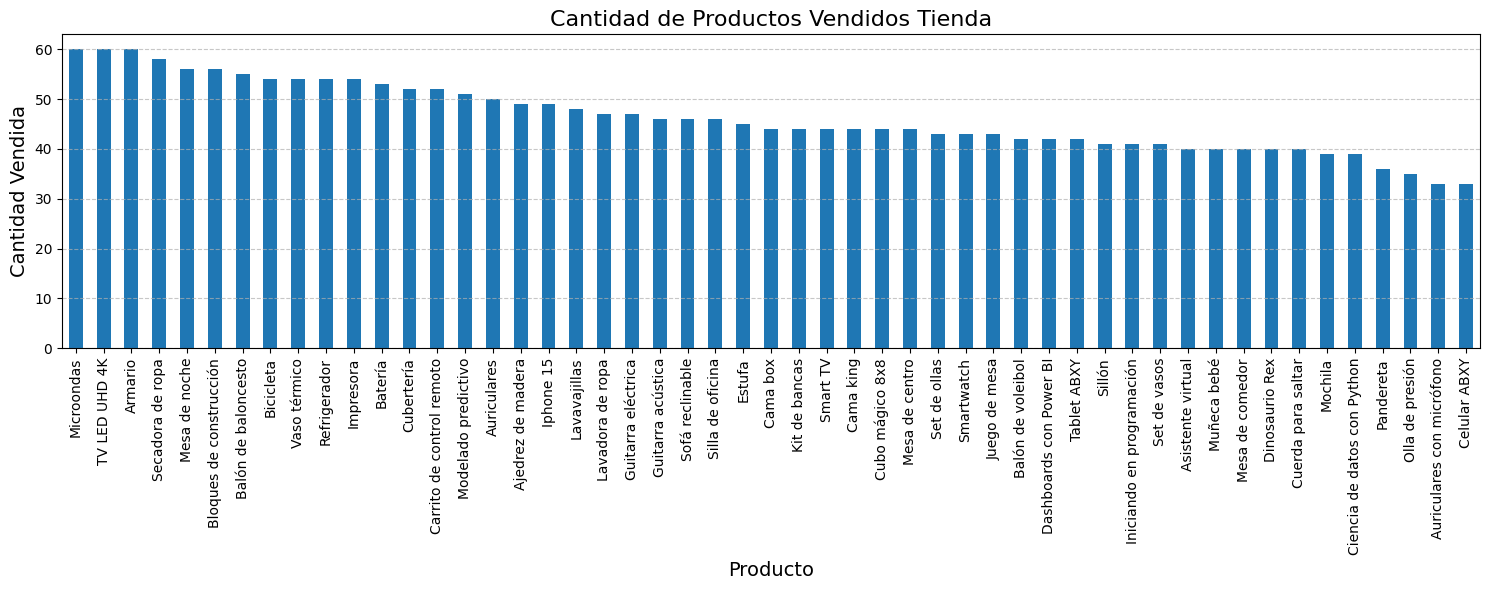

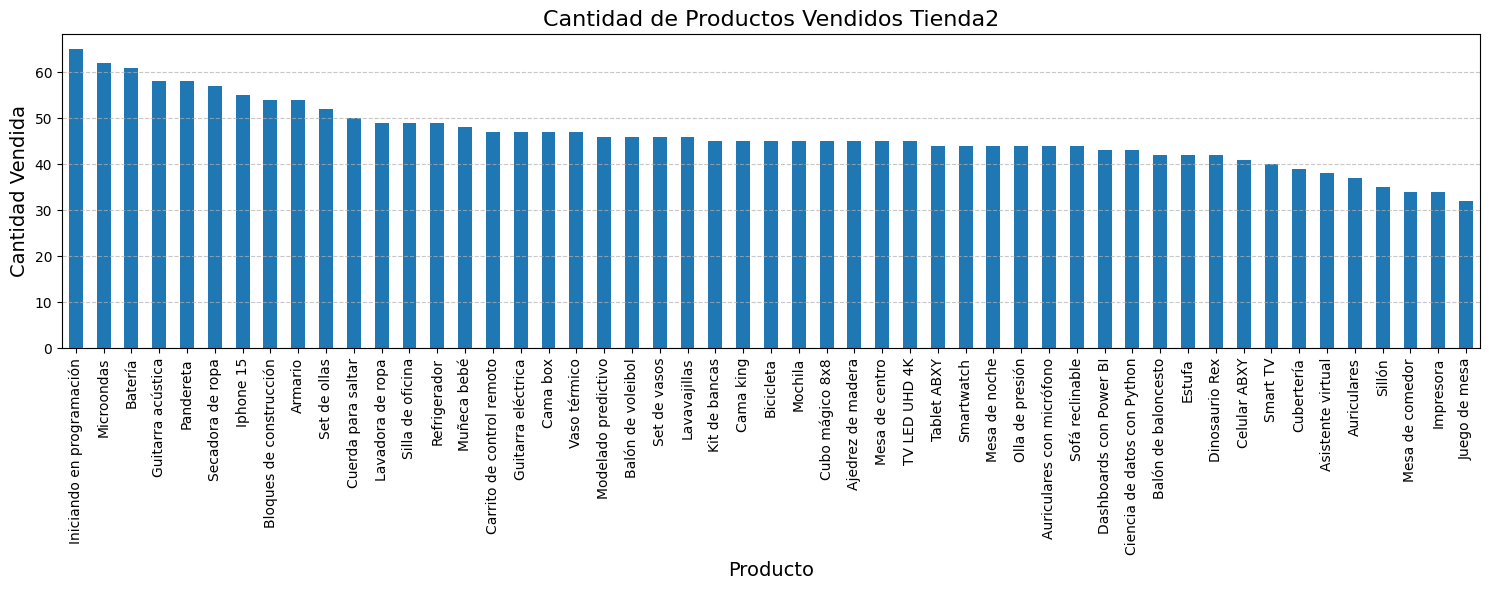

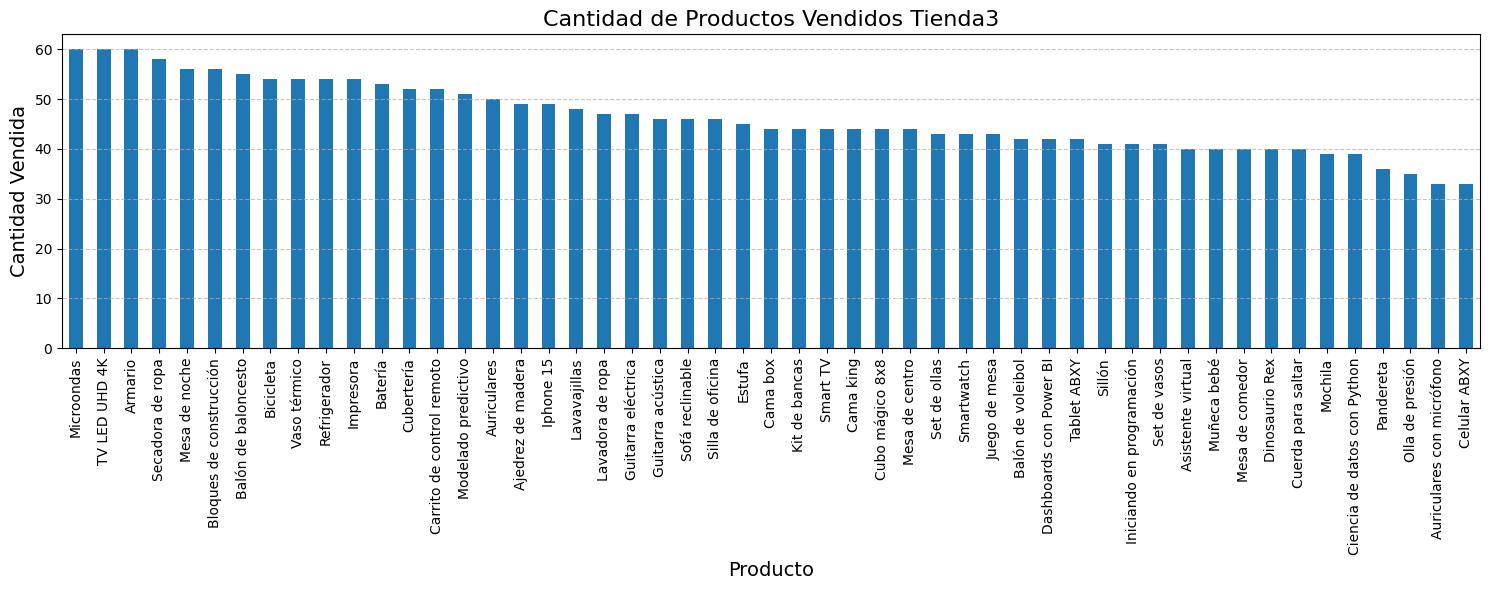

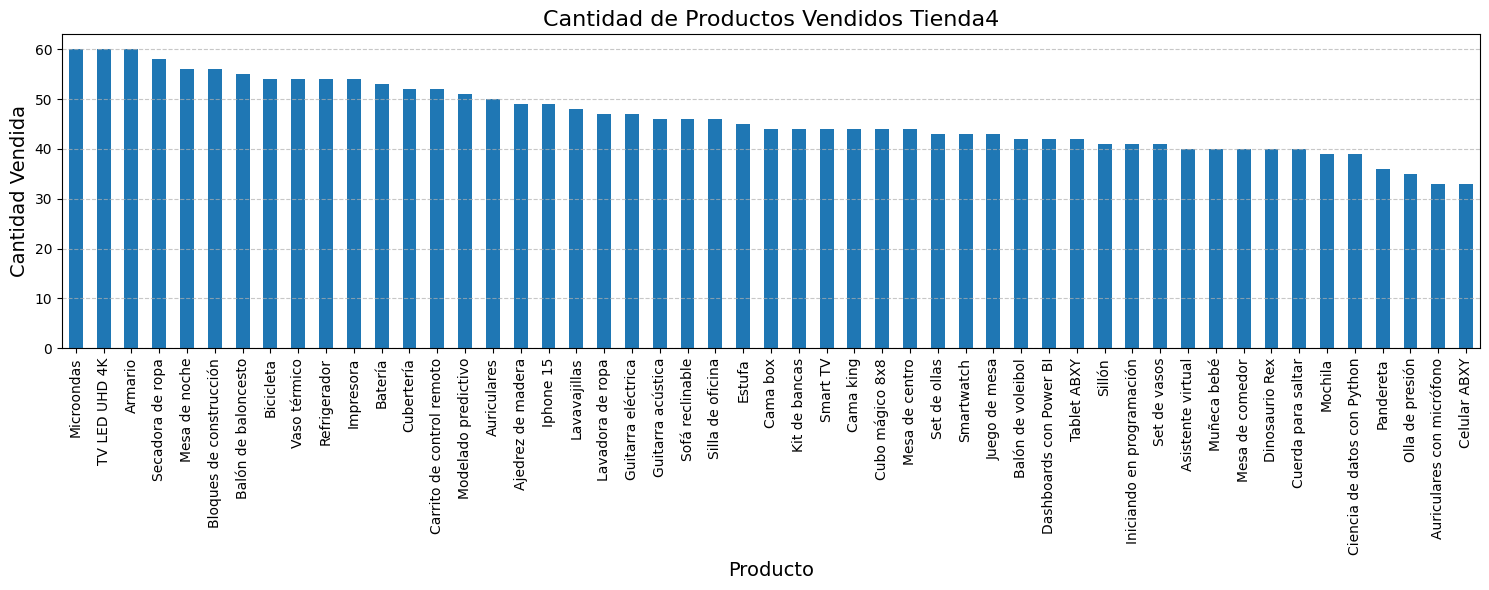

In [47]:
import matplotlib.pyplot as plt

conteo_productos = tienda['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


conteo_productos2 = tienda2['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos2.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda2', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

conteo_productos3 = tienda3['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda3', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

conteo_productos4 = tienda4['Producto'].value_counts()
plt.figure(figsize=(15,6))
conteo_productos.plot(kind='bar')
plt.title('Cantidad de Productos Vendidos Tienda4', fontsize=16)
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
promedioEnvioTienda=tienda['Costo de envío'].mean()
promedioEnvioTienda2=tienda2['Costo de envío'].mean()
promedioEnvioTienda3=tienda3['Costo de envío'].mean()
promedioEnvioTienda4=tienda4['Costo de envío'].mean()

print(f"El costo promedio de tienda es: {promedioEnvioTienda}")
print(f"El costo promedio de tienda2 es: {promedioEnvioTienda2}")
print(f"El costo promedio de tienda3 es: {promedioEnvioTienda3}")
print(f"El costo promedio de tienda4 es: {promedioEnvioTienda4}")

El costo promedio de tienda es: 26018.60958033065
El costo promedio de tienda2 es: 25216.235693090293
El costo promedio de tienda3 es: 24805.680373039424
El costo promedio de tienda4 es: 23459.457167090754


# 5. Envío promedio por tienda